## k-최근접 이웃 회귀모형

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
from GraphicSetting import *
import hds_stats as hds

### 실습 데이터셋 준비

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python/MachineLearning/code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z', 'Univ_Admit.z', 'Cereal_Dataset.z']

In [5]:
# 회귀모형 실습 데이터셋을 호출합니다.
df = joblib.load(filename = 'Used_Cars_Price.z')

### 입력변수 행렬과 목표변수 벡터로 분리

In [6]:
# df의 처음 5행을 출력합니다.
df.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23,46986,90,1,0,2000,3,1165,0,1,0
1,13750,23,72937,90,1,0,2000,3,1165,0,1,0
2,13950,24,41711,90,1,0,2000,3,1165,0,1,0
3,14950,26,48000,90,0,0,2000,3,1165,0,1,0
4,13750,30,38500,90,0,0,2000,3,1170,0,1,0


In [7]:
# 목표변수명을 yvar에 할당합니다.
yvar = 'Price'

In [8]:
# 데이터프레임을 입력변수 행렬과 목표변수 벡터로 분리합니다.
X = df.drop(columns = yvar)
y = df[yvar].copy()

### 실습 데이터셋 분할

In [9]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [10]:
# 전체 데이터셋의 80%를 훈련셋, 20%를 검증셋으로 분할합니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.2, random_state = 0
)

### 훈련셋과 검증셋 확인

In [11]:
# 훈련셋 입력변수 행렬의 크기를 확인합니다.
X_train.shape

(1014, 11)

In [12]:
# 검증셋 입력변수 행렬의 크기를 확인합니다.
X_valid.shape

(254, 11)

In [13]:
# 훈련셋 목표변수의 평균을 확인합니다.
y_train.mean()

9702.940828402367

In [14]:
# 검증셋 목표변수의 평균을 확인합니다.
y_valid.mean()

9672.53937007874

### 데이터 표준화

In [15]:
# 관련 라이브러리를 호출합니다.
from sklearn.preprocessing import StandardScaler

In [16]:
# 데이터 표준화 객체를 생성합니다.
scaler = StandardScaler()

In [17]:
# 훈련셋 입력변수 행렬을 표준화합니다.
X_train = scaler.fit_transform(X = X_train)

In [18]:
# 검증셋 입력변수 행렬을 표준화합니다.
X_valid = scaler.transform(X = X_valid)

### 가중치 없는 회귀모형 적합

In [19]:
# 관련 라이브러리를 호출합니다.
from sklearn.neighbors import KNeighborsRegressor

In [20]:
# 가중치 없는 회귀모형을 설정합니다.
model = KNeighborsRegressor(
    n_neighbors = 5, 
    weights = 'uniform', 
    metric = 'euclidean'
)

In [21]:
# 훈련셋으로 가중치 없는 회귀모형을 적합합니다.
model.fit(X = X_train, y = y_train)

KNeighborsRegressor(metric='euclidean')

In [22]:
# 가중치 없는 회귀모형의 파라미터를 확인합니다.
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [23]:
# 가중치 없는 회귀모형의 훈련셋 결정계수를 확인합니다.
model.score(X = X_train, y = y_train)

0.7802749022943649

In [24]:
# 가중치 없는 회귀모형의 검증셋 결정계수를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.6942671613341276

### 회귀모형 성능 평가

In [25]:
# 가중치 없는 회귀모형의 검증셋 추정값을 생성합니다.
y_tpred1 = model.predict(X = X_valid)

In [26]:
# 가중치 없는 회귀모형의 성능지표를 출력합니다.
hds.stat.regmetrics(y_true = y_valid, y_pred = y_tpred1)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.342201e+06,1158.534156,0.015142,0.123055,916.81811,0.098825


### 가중치 있는 회귀모형 적합

In [27]:
# 기존 모형에 가중치 유형을 설정합니다.
model.set_params(weights = 'distance')

KNeighborsRegressor(metric='euclidean', weights='distance')

In [28]:
# 훈련셋으로 가중치 있는 회귀모형을 적합합니다.
model.fit(X = X_train, y = y_train)

KNeighborsRegressor(metric='euclidean', weights='distance')

In [29]:
# 가중치 있는 회귀모형의 훈련셋 결정계수를 확인합니다.
model.score(X = X_train, y = y_train)

0.9999951234526139

In [30]:
# 가중치 있는 회귀모형의 검증셋 결정계수를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7141795352707923

### 회귀모형 성능 평가

In [31]:
# 가중치 있는 회귀모형의 검증셋 추정값을 생성합니다.
y_tpred2 = model.predict(X = X_valid)

In [32]:
# 가중치 있는 회귀모형의 성능지표를 출력합니다.
hds.stat.regmetrics(y_true = y_valid, y_pred = y_tpred2)

,MSE,RMSE,MSLE,RMSLE,MAE,MAPE
0,1.254784e+06,1120.171344,0.01441,0.120042,906.487171,0.098124


### 최적의 이웃 개수(k) 탐색

In [33]:
# k의 범위를 설정합니다.
ks = range(1, 101)

In [34]:
# 검증셋 결정계수를 저장할 빈 리스트를 생성합니다.
valid_scores = []

In [35]:
# 반복문으로 k를 바꿔가면서 검증셋 결정계수를 리스트에 추가합니다.
for k in ks:
    model.set_params(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    valid_scores.append(model.score(X = X_valid, y = y_valid))

### 최적의 이웃 개수(k) 탐색 결과 시각화

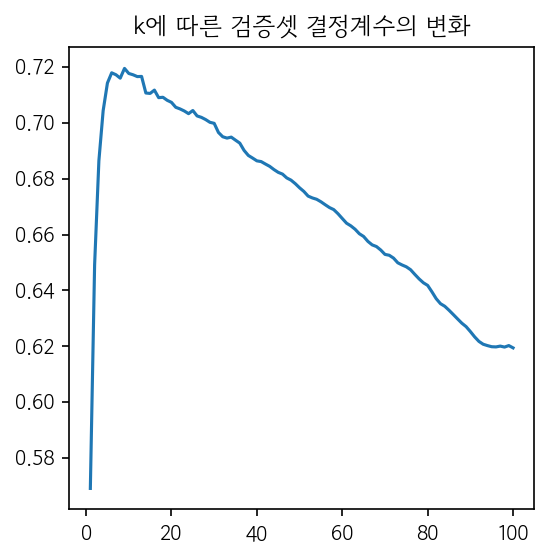

In [36]:
# 검증셋 결정계수로 선 그래프를 그립니다.
sns.lineplot(x = ks, y = valid_scores)
plt.title(label = 'k에 따른 검증셋 결정계수의 변화');

In [37]:
# 검증셋 결정계수가 최댓값일 때의 k를 확인합니다.
ks[np.argmax(a = valid_scores)]

9

In [38]:
# 검증셋 결정계수의 최댓값을 확인합니다.
np.max(a = valid_scores)

0.7194141773223084

## End of Document